## Dataset:

File:                     Multi-Modal MRI Data/person

File Format:          nii.gz

Image Shape:       240(Slide Width) × 240(Slide Height) × 155(Number of Slide) × 4(Multi-mode)

Image Mode:        4 (Multi-mode)



# Multimodal data
channel 0: FLAIR                    
channel 1: T1                     
channel 2: T1c                            
channel 3: T2                           


## Labels

channel 0: background \
channel 1: necrotic and non-enhancing tumor \
channel 2: edema \
channel 3: enhancing tumor 

will change the intensity of the mask to different values to create the binary class problem \
C1 = 50     # Necrotic and Non-enhancing Tumor \
C2 = 100    # Edema \
C3 = 150    # Enhancing Tumor

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import torch
import glob
import os, sys, time
import h5py
import random
from torch.utils import data
import helpers
from pathlib import Path
import matplotlib.gridspec as gridspec
import cv2
import shutil

In [2]:
def getfilename(rootdir,volume):
    filename = rootdir+f'volume_{int(volume)}_slice*.h5'
    #print(filename)
    file = glob.glob(filename)
    
    return file

130

In [3]:
rootdir = '/home/jay/Documents/courses/Aicourse/Brats/BraTS2020_training_data/content/data/'
volume = []
allfilename = glob.glob(rootdir+'/*.h5')
for i in range(len(allfilename)):
    name = allfilename[i].split('volume_')[1].split('_')[0]
    if name not in volume:
        volume.append(name)

In [13]:
np.shape(volume)

(369,)

In [4]:
volume = volume[0:10]

In [4]:
rootdir = '/home/jay/Documents/courses/Aicourse/Brats/BraTS2020_training_data/content/data/'
outputdir = '/home/jay/Documents/courses/Aicourse/Brats/'
try:
    shutil.rmtree(outputdir +'/train/')
except:
    pass

try:
    shutil.rmtree(outputdir +'/test/')
except:
    pass

try:
    shutil.rmtree(outputdir +'/validation/')
except:
    pass

try:
    os.makedirs(outputdir +'/train/')
except:
    pass
try:   
    os.makedirs(outputdir +'/test/')
except:
    pass
try:    
    os.makedirs(outputdir +'/validation/')
except:
    pass

np.random.seed(20894573)
np.random.shuffle(volume)

train_size = 0.85
validation_size = 0.075


train, validate, test=np.split(np.array(volume), [int(train_size*len(volume)), int((1-validation_size)*len(volume))])

do_save = False

print(f'Train: {np.shape(train)[0]}, Valid: {np.shape(validate)[0]}, Test: {np.shape(test)[0]}')
trainfile=0
validfiles=0
testfiles=0
volumetrain=[]
volumevalid=[]
volumetest=[]
for i in range(len(train)):
    nametrain = getfilename(rootdir, train[i])
    data=[]
    for j in range(len(nametrain)):
        data.append(h5py.File(nametrain[j], 'r')['mask'])
    volumetrain.append(np.sum(data))

    if do_save==True:
        for name in nametrain:
        #print(name)
            shutil.copy(name, outputdir +'/train/')
            trainfile = trainfile+1
        
for i in range(len(validate)):
    namevalid = getfilename(rootdir, validate[i])
    data=[]
    for j in range(len(namevalid)):
        data.append(h5py.File(namevalid[j], 'r')['mask'])
    volumevalid.append(np.sum(data))
    if do_save==True:
        for name in namevalid:
            shutil.copy(name, outputdir +'/validation/')
            validfiles= validfiles+ 1
        
for i in range(len(test)):
    nametest = getfilename(rootdir, test[i])
    data=[]
    for j in range(len(nametest)):
        data.append(h5py.File(nametest[j], 'r')['mask'])
    volumetest.append(np.sum(data))

    if do_save==True:
        for name in nametest:
            shutil.copy(name, outputdir +'/test/')
            testfiles =  testfiles+1
        
print(f'Train: {trainfile}, Valid: {validfiles}, Test: {testfiles}')


Train: 313, Valid: 28, Test: 28
Train: 0, Valid: 0, Test: 0


Text(0.5, 1.0, 'Test: Volume of the tumor')

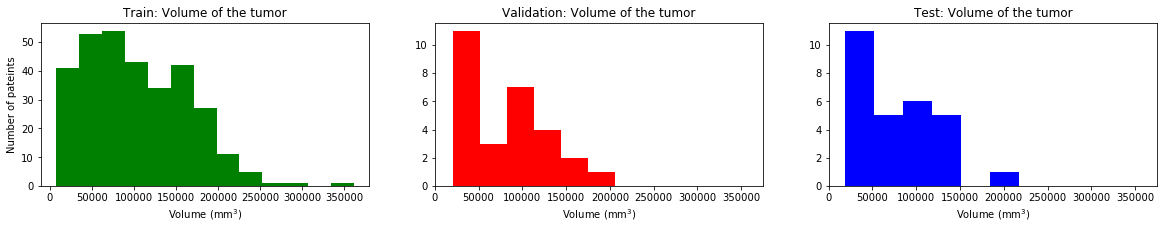

In [63]:
plt.figure(figsize=[20,3])
plt.subplot(1,3,1)
plt.hist(volumetrain, bins='auto',  facecolor='g')
plt.ylabel('Number of pateints')
plt.xlabel(r'Volume (mm$^3$)')
plt.title('Train: Volume of the tumor')
plt.subplot(1,3,2)
plt.hist(volumevalid, bins='auto',facecolor='r')
plt.xlim([0,375000])
plt.xlabel(r'Volume (mm$^3$)')
plt.title('Validation: Volume of the tumor')

plt.subplot(1,3,3)
plt.hist(volumetest, bins='auto',facecolor='b')
plt.xlim([0,375000])
plt.xlabel(r'Volume (mm$^3$)')
plt.title('Test: Volume of the tumor')


<ipython-input-14-ef66cc0c3313>:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


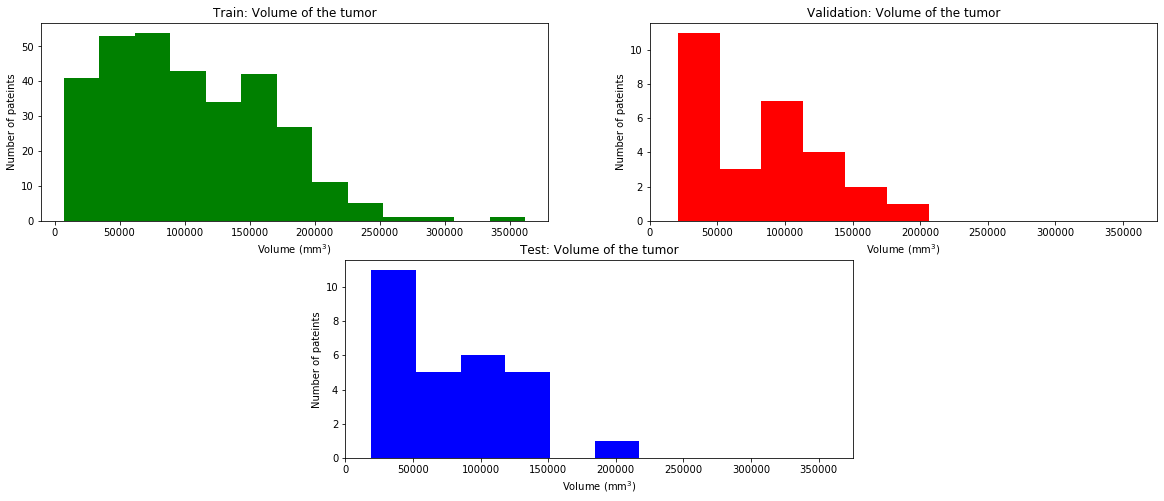

In [14]:
gs = gridspec.GridSpec(2, 4)
gs.update(wspace=0.5)
plt.figure(figsize=[20,8])
ax1 = plt.subplot(gs[0, :2], )
plt.hist(volumetrain, bins='auto',  facecolor='g')
plt.ylabel('Number of pateints')
plt.xlabel(r'Volume (mm$^3$)')
plt.title('Train: Volume of the tumor')
ax2 = plt.subplot(gs[0, 2:])
plt.hist(volumevalid, bins='auto',facecolor='r')
plt.xlim([0,375000])
plt.xlabel(r'Volume (mm$^3$)')
plt.ylabel('Number of pateints')
plt.title('Validation: Volume of the tumor')
ax3 = plt.subplot(gs[1, 1:3])
plt.hist(volumetest, bins='auto',facecolor='b')
plt.xlim([0,375000])
plt.xlabel(r'Volume (mm$^3$)')
plt.title('Test: Volume of the tumor')
plt.ylabel('Number of pateints')
plt.tight_layout()

plt.savefig('Volume.png', dpi=600)
plt.show()